In [4]:
import pandas as pd
import tensorflow as tf
from sklearn.svm import SVC
import seaborn as sb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<AxesSubplot:>

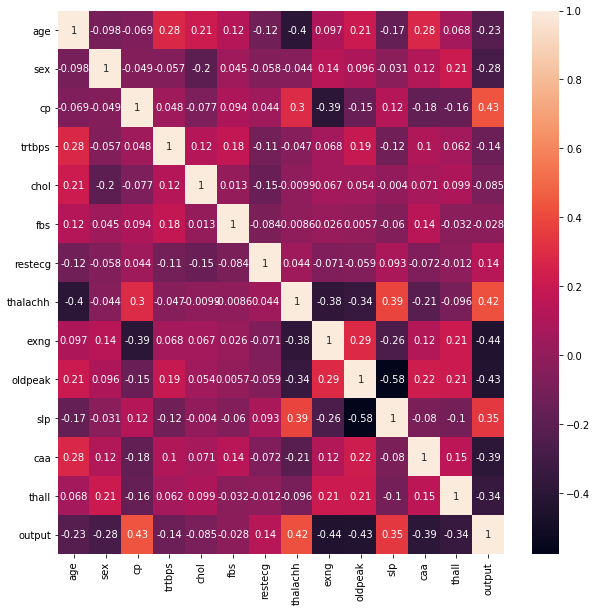

In [7]:
fig = plt.figure(figsize=(10,12))
sb.heatmap(df.corr(),annot=True)
plt.plot()

In [41]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

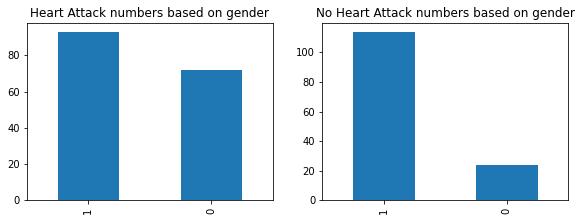

In [55]:
ax = plt.figure(figsize=(15,15))
ax = plt.subplot(431)
df[df['output'] == 1]['sex'].value_counts().plot(kind = 'bar')
plt.title("Heart Attack numbers based on gender")
ax = plt.subplot(432)
df[df['output'] == 0]['sex'].value_counts().plot(kind = 'bar')
plt.title("No Heart Attack numbers based on gender")
plt.show()

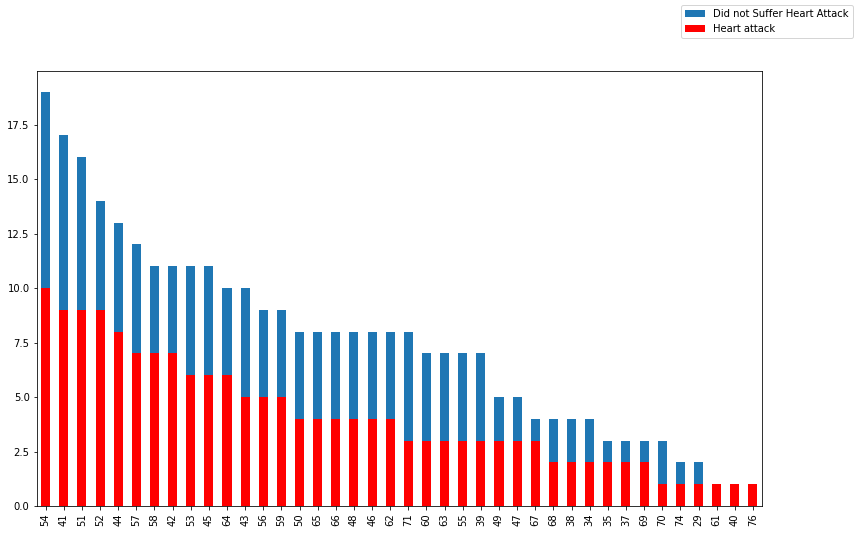

In [105]:
ax = plt.figure(figsize = (13,8))
df['age'].value_counts().plot(kind = 'bar')
df[df['output']==1]['age'].value_counts().plot(kind = 'bar',color='r')
ax.legend(["Did not Suffer Heart Attack","Heart attack"])
plt.show()

The above graph shows how much data there is on each and red shows how much of the total have had heart attacks

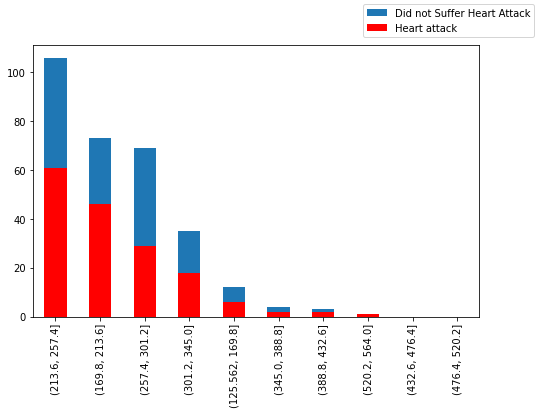

In [120]:
ax = plt.figure(figsize = (8,5))
df['chol_interval'] = pd.cut(x = df['chol'],bins = 10)
df['chol_interval'].value_counts().plot(kind = 'bar')
df[df['output']==1]['chol_interval'].value_counts().plot(kind = 'bar',color='r')
ax.legend(["Did not Suffer Heart Attack","Heart attack"])
df.drop(['chol_interval'],axis = 1,inplace= True)
plt.show()

We can see that as the range goes beyond normal range 200 and 240 are much more likelier to suffer a heart attack but there seems to be oddity in the 260 to 300 range

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
svm = SVC(C=0.5,max_iter=1000)

In [12]:
X = df.iloc[:,:-1].to_numpy()
y = df['output'].to_numpy()
X.shape,y.shape

((303, 13), (303,))

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1)

In [14]:
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

0.6129032258064516

In [22]:
model_test = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation = 'sigmoid'),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Activation('sigmoid')
])

In [23]:
lss = tf.keras.losses.BinaryCrossentropy()
acc = tf.keras.metrics.BinaryAccuracy()
model_test.compile(loss = lss,metrics=[acc])

In [24]:
hist = model_test.fit(X_train,y_train,epochs=20,batch_size = 64)

Epoch 1/20
5/5 [==============================] - 1s 4ms/step - loss: 0.7430 - binary_accuracy: 0.4619
Epoch 2/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6710 - binary_accuracy: 0.5721
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6569 - binary_accuracy: 0.6883
Epoch 4/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6530 - binary_accuracy: 0.6938
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6546 - binary_accuracy: 0.6641
Epoch 6/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6411 - binary_accuracy: 0.7267
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6498 - binary_accuracy: 0.6837
Epoch 8/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6429 - binary_accuracy: 0.6914
Epoch 9/20
5/5 [==============================] - 0s 5ms/step - loss: 0.6489 - binary_accuracy: 0.6615
Epoch 10/20
5/5 [==============================] - 0s 5ms/step - loss: 0.

In [25]:
# import warnings
# warnings.filterwarnings('ignore')
model_test.evaluate(X_test,y_test)

1/1 [==============================] - 0s 104ms/step - loss: 0.6356 - binary_accuracy: 0.7097


[0.6355745792388916, 0.7096773982048035]

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression(max_iter = 1000)

In [28]:
lr.fit(X_train,y_train,)
lr.score(X_test,y_test)

0.8387096774193549

We can see that a normal simple model works best rather than complex models like neural network since the amount of data is small and hence it works best with logistical regression